In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, preprocessing
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call
import graphviz

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [3]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)
titanic_df['Age']
titanic_df.dropna()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [6]:
# Check if there is missing data
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [7]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [8]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [9]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,False,False,True
887,1,1,19.000000,0,0,30.0000,True,False,False,False,True
888,0,3,29.699118,1,2,23.4500,True,False,False,False,True
889,1,1,26.000000,0,0,30.0000,False,True,True,False,False


In [10]:
# define X and y 
X = titanic_df.iloc[:,[1,2,3,4,5,6,7,8,9,10]].values.reshape(-1,10)
y = titanic_df.iloc[:,0].values.reshape(-1,1)
# getting name array for Decision Tree figure 
names = ['Pclass','Age',	'SibSp',	'Parch','Fare',	'Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q',	'Embarked_S']
names2 = ['Pclass','Age']
# split the data into testin and training data
r = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=r)

In [11]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.776536312849162
At depth: 19


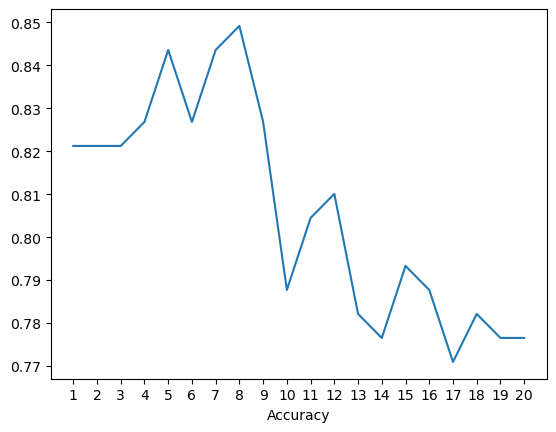

In [12]:
# looking at effect of pruning   
pruned_depths = range(1,21)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [13]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 8


DecisionTreeClassifier(max_depth=8)

In [14]:
print("Performance with pruning:", pruned.score(X_test, y_test))

Performance with pruning: 0.9162011173184358


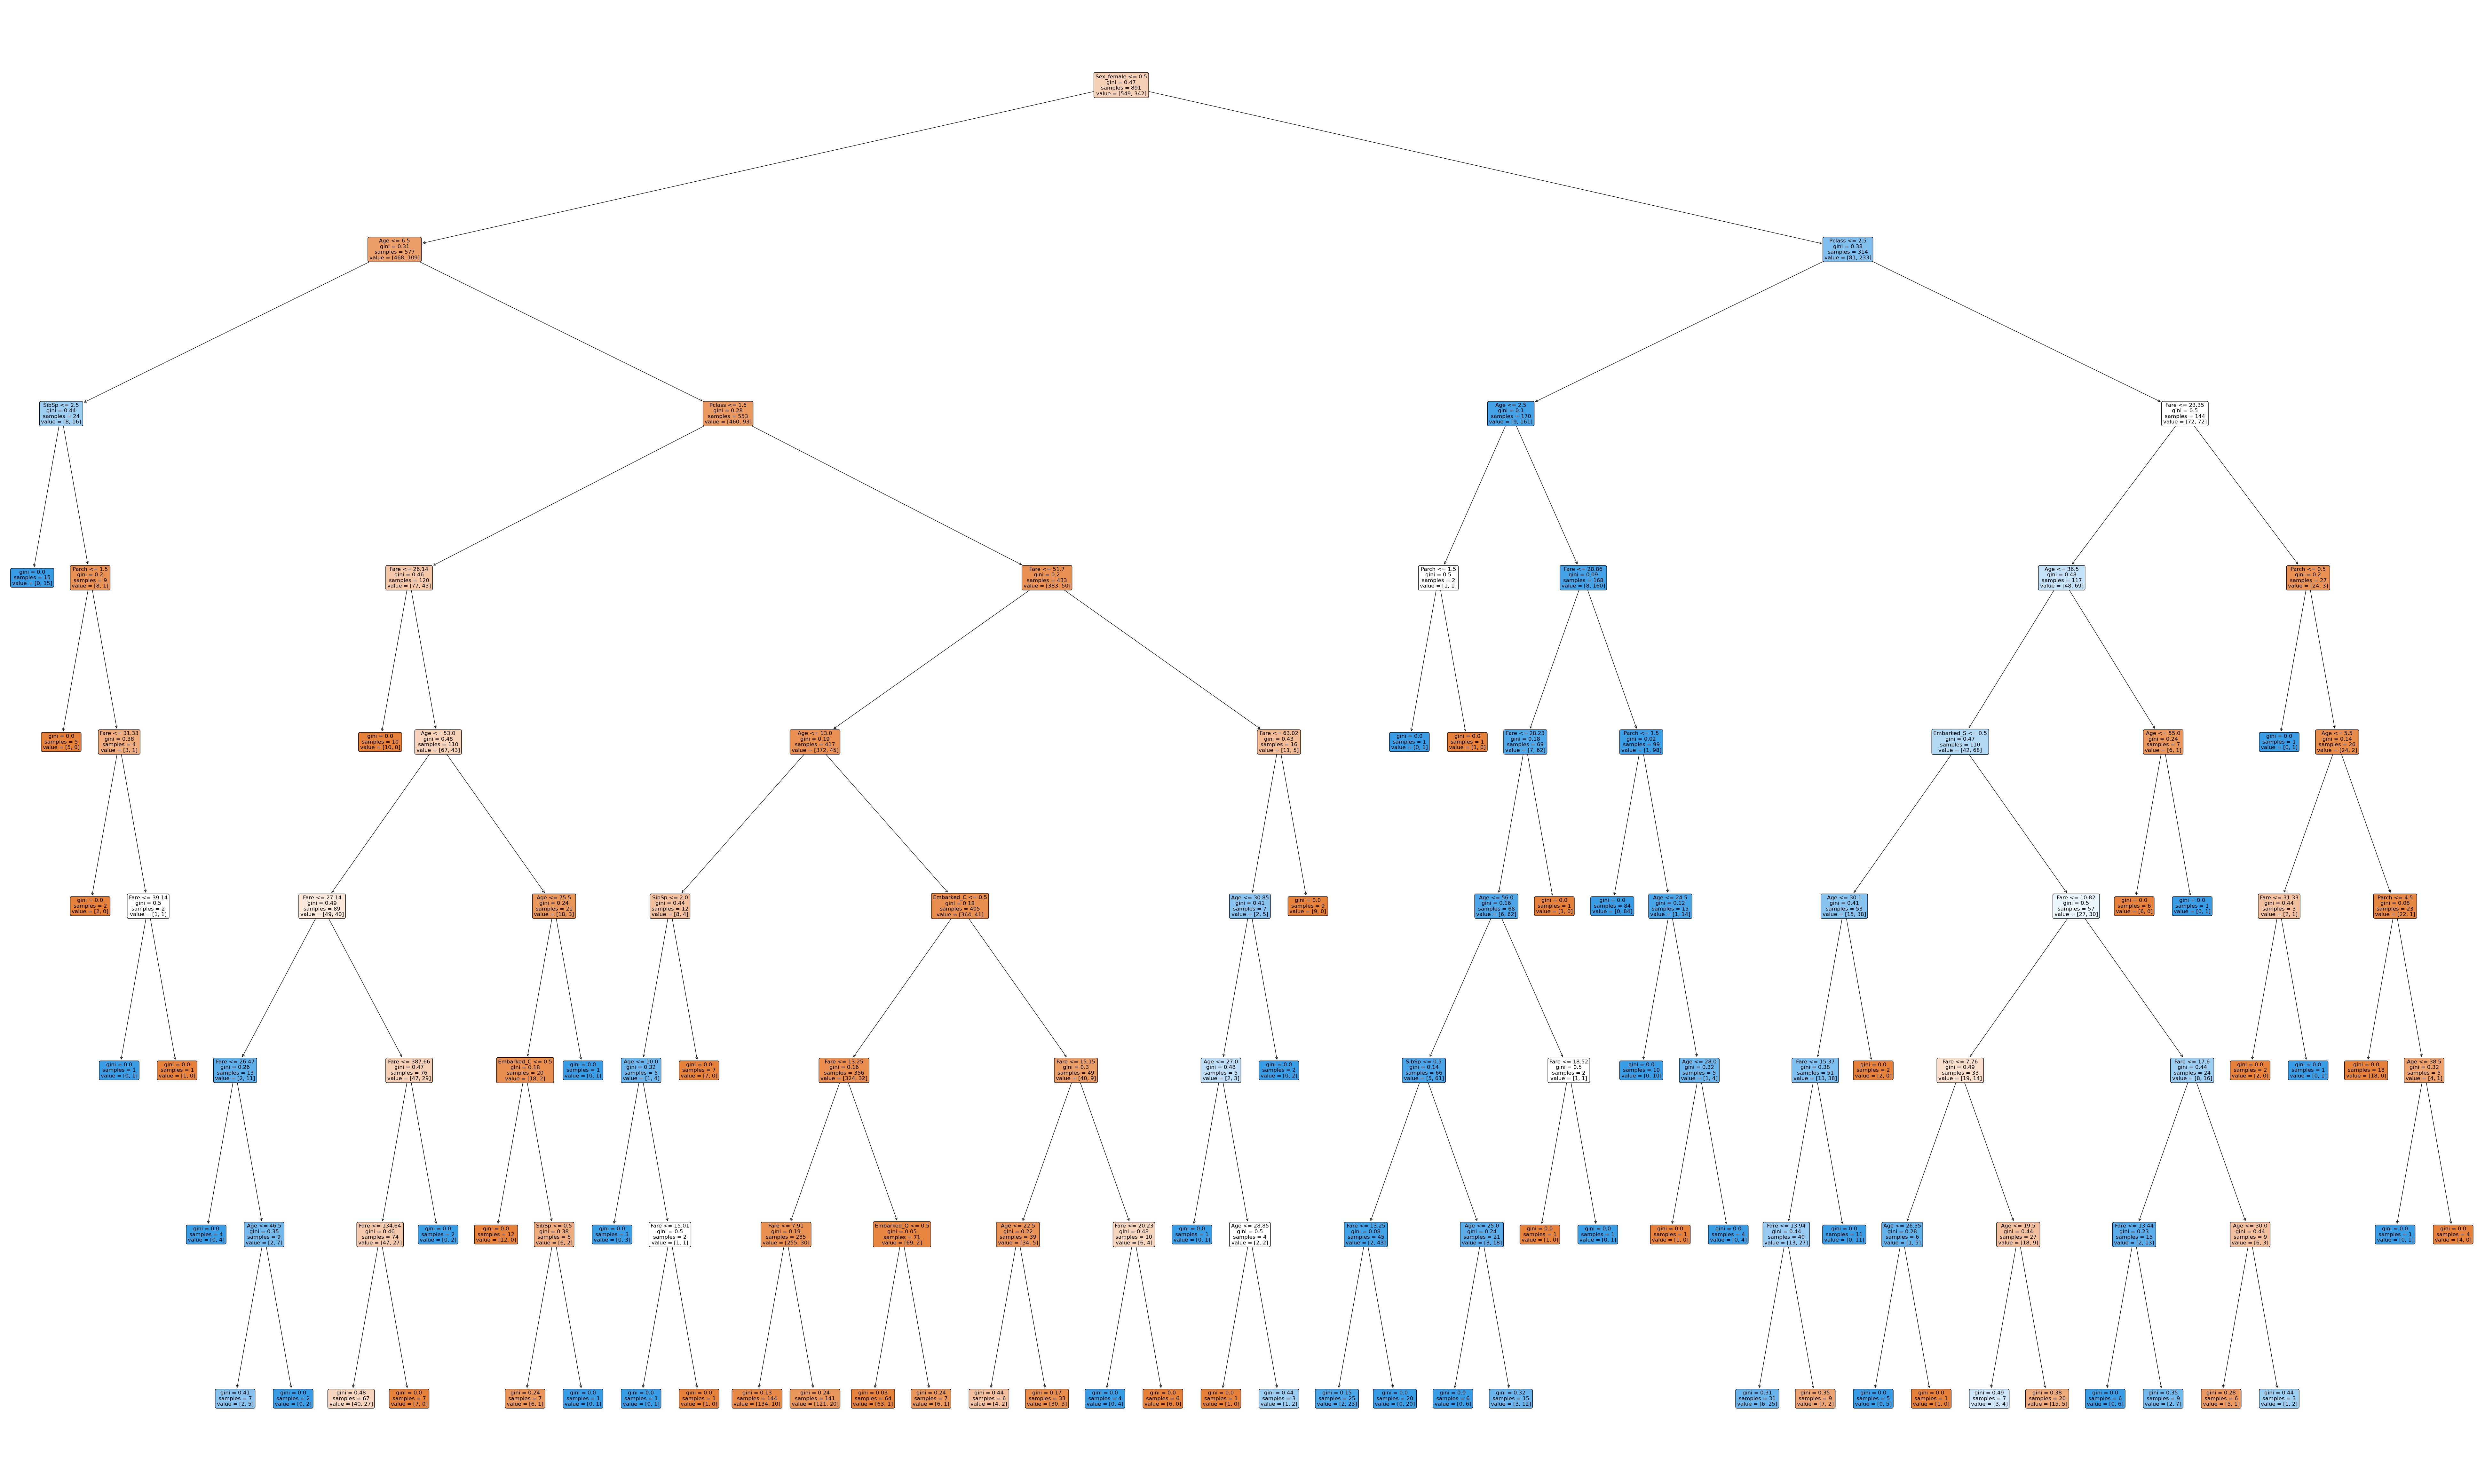

In [15]:
fig = plt.figure(figsize=(100, 60))
tree.plot_tree(pruned, feature_names = names ,rounded = True, proportion = False, precision = 2, filled = True) #display tree
fig.savefig('pruned_tree.png')

In [16]:
X_sep = titanic_df.iloc[:,[1,2]].to_numpy().reshape(-1,2)

In [17]:
X_sep = np.int8(X_sep)
X_sep

array([[ 3, 22],
       [ 1, 38],
       [ 3, 26],
       ...,
       [ 3, 29],
       [ 1, 26],
       [ 3, 32]], dtype=int8)

C:\Users\AMMAR\AppData\Local\Temp\ipykernel_57336\1507290502.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=names2[i],
C:\Users\AMMAR\AppData\Local\Temp\ipykernel_57336\1507290502.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=names2[i],
C:\Users\AMMAR\AppData\Local\Temp\ipykernel_57336\1507290502.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=names2[i],
C:\Users\AMMAR\AppData\Local\Temp\ipykernel_57336\1507290502.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=names2[i],
C:\Users\AMMAR\AppData\Local\Temp\ipykernel_57336\1507290502.py:26: UserWarning: No data

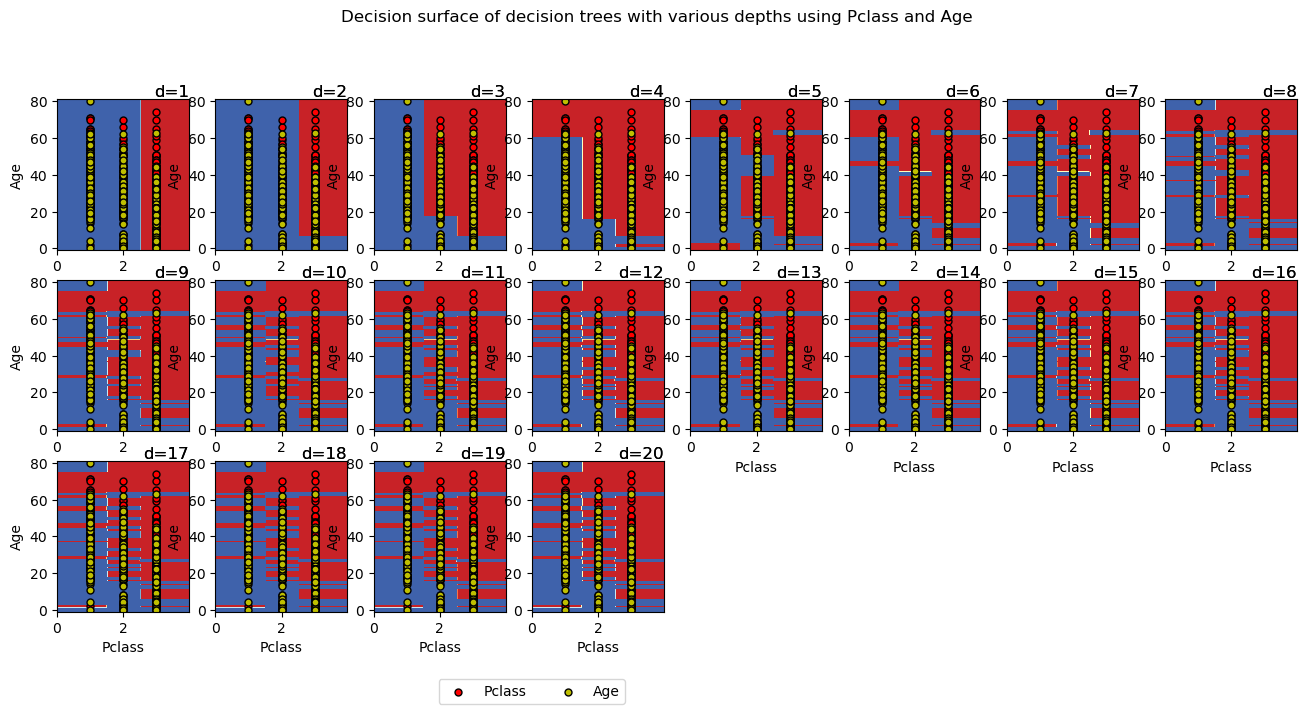

In [18]:
plt.figure(figsize=(16,9))
plt.suptitle("Decision surface of decision trees with various depths using Pclass and Age")

# make subplots for each depth
for idx, d in enumerate(pruned_depths):
  ax = plt.subplot(4, 8, idx+1)

  x_min, x_max = X_sep[:, 0].min() - 1, X_sep[:, 0].max() + 1
  y_min, y_max = X_sep[:, 1].min() - 1, X_sep[:, 1].max() + 1
  
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
  clf = DecisionTreeClassifier(max_depth=d).fit(X_sep, y)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(names[0])
  plt.ylabel(names[1])

  ax.title = plt.title('d={}'.format(d), loc='right', pad=-15)

  # Plot the training points
  for i, color in zip(range(2), "ryb"):
      idx = np.where(y == i)
      plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=names2[i],
                  cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
  
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0, -0.40))
plt.show()


In [19]:
# Random forest
# n_est = 10000
n_est = 10000
ensemble = BaggingClassifier(base_estimator=unpruned, n_estimators=n_est, random_state=r)
ensemble.fit(X_train,y_train)

c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                  n_estimators=10000, random_state=10)

In [20]:
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy ensemble: 0.8324022346368715


In [21]:
forest = RandomForestClassifier(n_estimators=n_est, random_state=r)
forest.fit(X_train, y_train)

feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

C:\Users\AMMAR\AppData\Local\Temp\ipykernel_57336\281639422.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


4    0.258112
1    0.256702
5    0.137659
6    0.132503
0    0.080995
2    0.057235
3    0.039771
9    0.016723
7    0.012990
8    0.007312
dtype: float64

In [22]:
# select important features
X = X[:,[0,1,4,5,6]]

# retrain 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
pruned.fit(X_train,y_train)
ensemble.fit(X_train,y_train)
unpruned.fit(X_train,y_train)

c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


DecisionTreeClassifier(random_state=10)

In [23]:
print(f'n_est = {n_est}')
print("RF Accuracy unpruned:",unpruned.score(X_test, y_test))
print("RF Accuracy pruned:",pruned.score(X_test, y_test))
print("RF Accuracy ensemble:",ensemble.score(X_test, y_test))

n_est = 10000
RF Accuracy unpruned: 0.7798507462686567
RF Accuracy pruned: 0.7947761194029851
RF Accuracy ensemble: 0.832089552238806


In [24]:
# n_est = 100
n_est = 100
ensemble = BaggingClassifier(base_estimator=unpruned, n_estimators=n_est, random_state=r)
ensemble.fit(X_train,y_train)

c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                  n_estimators=100, random_state=10)

In [25]:
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy ensemble: 0.8283582089552238


In [26]:
forest = RandomForestClassifier(n_estimators=n_est, random_state=r)
forest.fit(X_train, y_train)

feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

C:\Users\AMMAR\AppData\Local\Temp\ipykernel_57336\281639422.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


2    0.321413
1    0.274455
4    0.167064
3    0.153590
0    0.083477
dtype: float64

In [27]:
# select important features
X = X[:,:4]

# retrain 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
pruned.fit(X_train,y_train)
ensemble.fit(X_train,y_train)
unpruned.fit(X_train,y_train)

c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


DecisionTreeClassifier(random_state=10)

In [28]:
print(f'n_est = {n_est}')
print(" RF Accuracy unpruned:",unpruned.score(X_test, y_test))
print("RF Accuracy pruned:",pruned.score(X_test, y_test))
print("RF Accuracy ensemble:",ensemble.score(X_test, y_test))

n_est = 100
 RF Accuracy unpruned: 0.7686567164179104
RF Accuracy pruned: 0.8059701492537313
RF Accuracy ensemble: 0.7985074626865671


In [29]:
# n_est = 20
n_est = 20
ensemble = BaggingClassifier(base_estimator=unpruned, n_estimators=n_est, random_state=r)
ensemble.fit(X_train,y_train)
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy ensemble: 0.7761194029850746


c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [30]:
forest = RandomForestClassifier(n_estimators=n_est, random_state=r)
forest.fit(X_train, y_train)

feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

C:\Users\AMMAR\AppData\Local\Temp\ipykernel_57336\281639422.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


2    0.354290
1    0.305591
3    0.259360
0    0.080760
dtype: float64

In [31]:
# select important features
X = X[:,:3]

# retrain 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 30% test
pruned.fit(X_train,y_train)
ensemble.fit(X_train,y_train)
unpruned.fit(X_train,y_train)

c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AMMAR\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


DecisionTreeClassifier(random_state=10)

In [32]:
print(f'n_est = {n_est}')
print(" RF Accuracy unpruned:",unpruned.score(X_test, y_test))
print("RF Accuracy pruned:",pruned.score(X_test, y_test))
print("RF Accuracy ensemble:",ensemble.score(X_test, y_test))

n_est = 20
 RF Accuracy unpruned: 0.6871508379888268
RF Accuracy pruned: 0.6983240223463687
RF Accuracy ensemble: 0.7206703910614525


In conclusion, N estimator need to be as high as pobsilbe to give better prediction with fewer data. The Rf ensemble method showd that it is superior to even purend method if we consider fewer data input thus saving time and computitional power.